In [12]:
# Download the dataset
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Define the dataset and download path
dataset = 'masoudnickparvar/brain-tumor-mri-dataset'
download_path = '../data/'

# Download the dataset
api.dataset_download_files(dataset, path=download_path, unzip=True)

print(f"Dataset downloaded and extracted to {download_path}")

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
Dataset downloaded and extracted to ../data/


In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

find mean and sd of train images for normalization

In [26]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root="../data/Training", transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

In [27]:
# Initialize variables to store pixel statistics
mean = torch.zeros(3)
std = torch.zeros(3)
total_samples = 0

# Compute mean and standard deviation
for images, _ in train_loader:
    batch_samples = images.size(0)  # Batch size (number of images)
    images = images.view(batch_samples, 3, -1)  # Flatten HxW into one dimension
    mean += images.mean(dim=[0, 2])  # Compute mean per channel
    std += images.std(dim=[0, 2])  # Compute std per channel
    total_samples += batch_samples

# Average over all samples
mean /= len(train_loader)
std /= len(train_loader)

print(f"Mean: {mean}")
print(f"Std: {std}")

Mean: tensor([0.1855, 0.1855, 0.1855])
Std: tensor([0.1997, 0.1997, 0.1997])


In [28]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1854, 0.1854, 0.1855], std=[0.1994, 0.1994, 0.1995])
])

Display Before and after Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


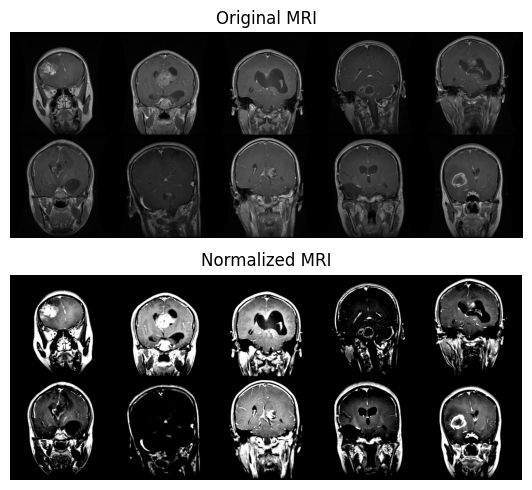

In [50]:
import torchvision.utils as vutils

# Load datasets without Normalization
train_dataset_raw = datasets.ImageFolder(root="../data/Training", transform=transforms.Compose([
    transforms.ToTensor()
]))

# Load datasets with Normalization
train_dataset = datasets.ImageFolder(root="../data/Training", transform=data_transform)

# Create DataLoaders
train_loader_raw = DataLoader(train_dataset_raw, batch_size=10, shuffle=False, num_workers=2)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False, num_workers=2)

# Get batch of images
images_raw, _ = next(iter(train_loader_raw))
images_transformed, _ = next(iter(train_loader))

# Display
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Show images
axes[0].imshow(vutils.make_grid(images_raw, nrow=5).permute(1, 2, 0))
axes[0].set_title("Original MRI")
axes[0].axis("off")

# Normalized images
axes[1].imshow(vutils.make_grid(images_transformed, nrow=5).permute(1, 2, 0))
axes[1].set_title("Normalized MRI")
axes[1].axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


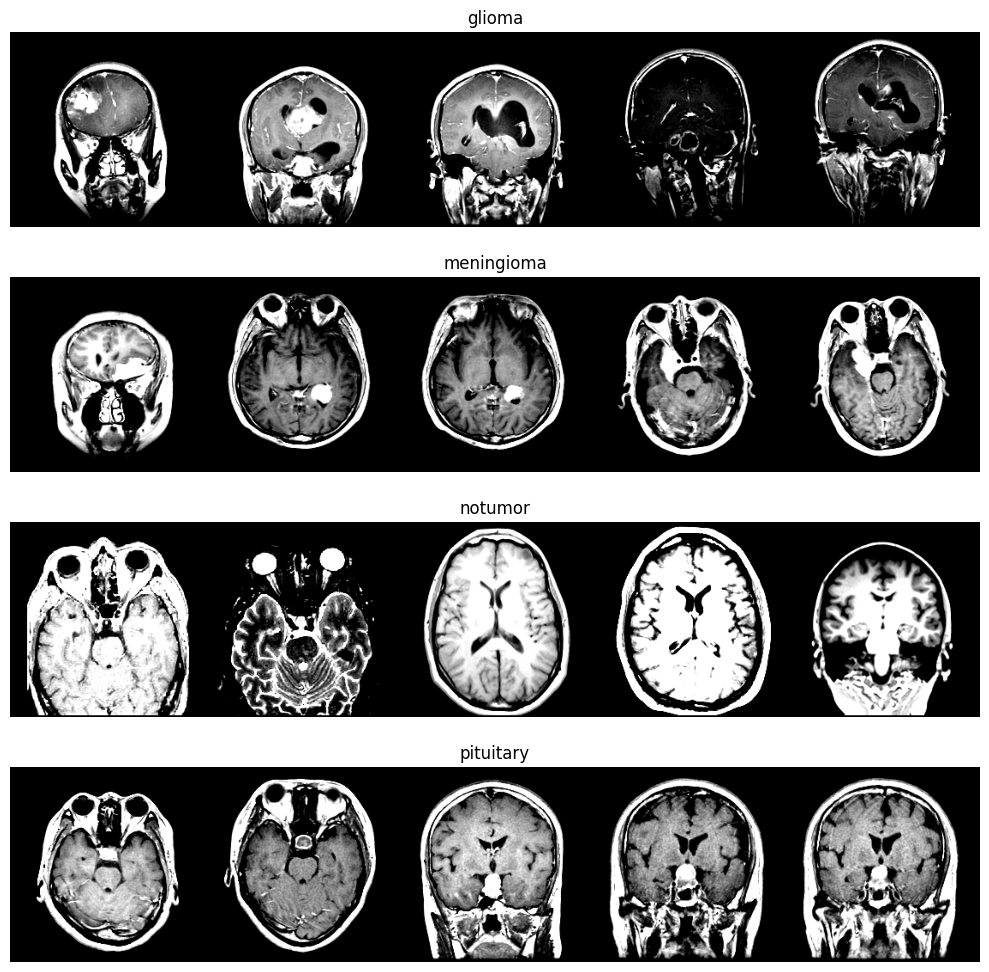

In [49]:
classes = train_dataset.classes
images_class = {class_name: [] for class_name in classes}

for images, labels in train_loader:
    for img, label in zip(images, labels):
        class_name = classes[label]
        # get 5 images per class
        if len(images_class[class_name]) < 5:
            images_class[class_name].append(img)
    # Stop when we have 5 images per class
    if all(len(imgs) == 5 for imgs in images_class.values()):
        break
    
# Display images
fig, axes = plt.subplots(len(classes), 1, figsize=(10, 10))

for i, class_name in enumerate(classes):
    imgs = torch.stack(images_class[class_name])
    axes[i].imshow(vutils.make_grid(imgs, nrow=5).permute(1, 2, 0))
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import os


['glioma', 'meningioma', 'notumor', 'pituitary']

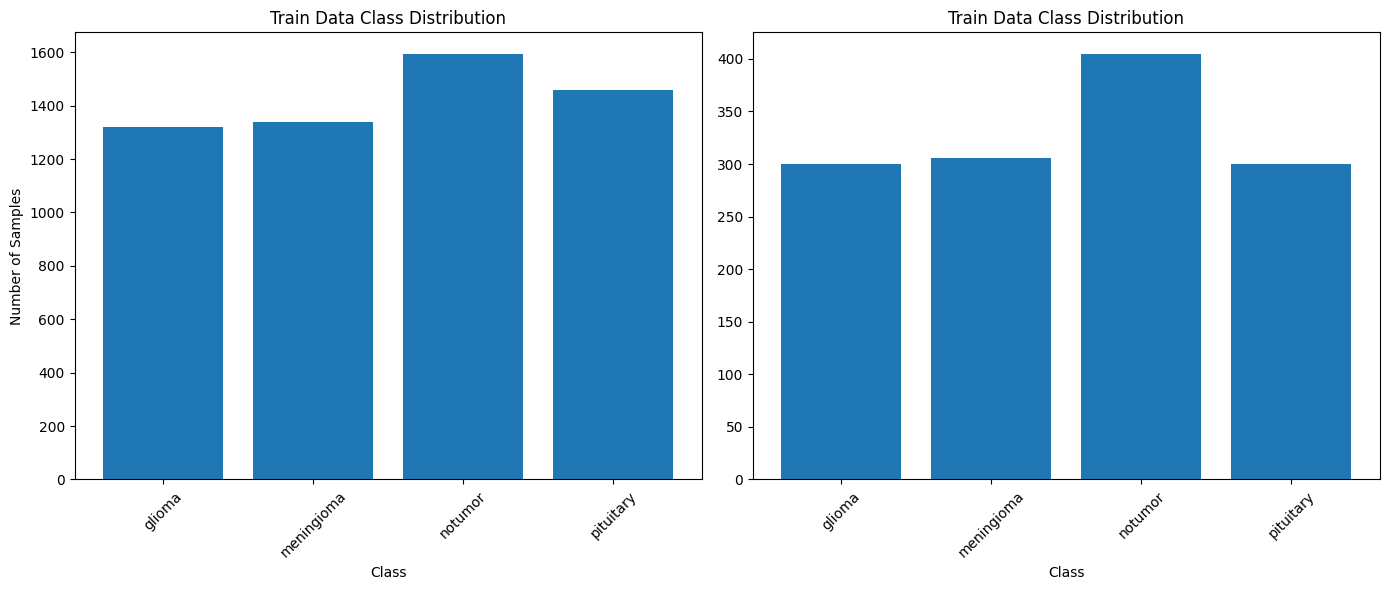

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
def plot_bar(classes, counts, ax, title=""):
    ax.bar(classes, counts)
    ax.set_title(title)
    ax.set_xlabel('Class')
    ax.tick_params(axis='x', rotation=45)

classes = os.listdir("../data/Training")
counts = [len(os.listdir("../data/Training/" + x))  for x in classes]
plot_bar(classes, counts, axes[0], title="Train Data Class Distribution")

classes = os.listdir("../data/Testing")
counts = [len(os.listdir("../data/Testing/" + x))  for x in classes]
plot_bar(classes, counts, axes[1], title="Train Data Class Distribution")

axes[0].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()